<a href="https://colab.research.google.com/github/kushalk20/Deep-Learning/blob/main/simpleNN_singleNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 2nd June, 2023
# Ref: https://www.kaggle.com/code/ryanholbrook/a-single-neuron

In [1]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/Deep Learning"

In [18]:
# 2.2 Full file path:
path = Path(pathToFolder) / "red_wine.csv"

In [19]:
path

PosixPath('/gdrive/MyDrive/Deep Learning/red_wine.csv')

In [20]:
# 3.0 Read data
red_wine = pd.read_csv(path)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
red_wine.tail()
# Model is a collection of pattern, here we are predicting Quality feature.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [22]:
# 3.1
red_wine.shape   # (1599, 12)
red_wine.dtypes

(1599, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [23]:
# 3.2 Get target and predictors:
y = red_wine.pop("quality")
X = red_wine

In [53]:
# 4.0 Build model:
# It is Sequential in the sense as there is sequence of layers...First is Input layer..Then is hidden layer...Output layers..
model = tf.keras.Sequential()

In [54]:
# 4.1 First/Input layer wants to know how many features are there is X.. AS uske basis no. of neurons decide hongey
model.add(layers.Input( shape = (X.shape[1],) ) )
# X.shape[1] is giving the no. of features of the dataset.. Since X.shape() tells rows & columns.....so X.shape[1] is giving
# the second number of the output is no. of columns

In [55]:
# 4.2.1 Adding one hidden layer with only 11 neuron, if we won't specify activation function, default is linear
model.add(layers.Dense(11, activation='tanh'))

In [56]:
# 4.2.1 Adding one hidden layer with only 770 neuron
model.add(layers.Dense(770, activation='relu'))

In [57]:
# 4.2.2 Adding one hidden layer with only 1 neuron
model.add(layers.Dense(1, activation='sigmoid'))

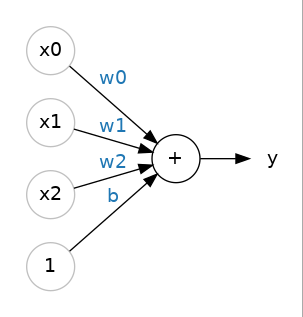

In [ ]:
# 4.2.1
weights, bias = model.weights

In [ ]:
# 4.2.2
weights

<tf.Variable 'dense_2/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.5324891 ],
       [ 0.28452057],
       [-0.03032851],
       [ 0.09491569],
       [-0.16538829],
       [ 0.55350345],
       [ 0.5626977 ],
       [ 0.2902311 ],
       [-0.48377115],
       [ 0.03395367],
       [-0.607404  ]], dtype=float32)>

In [ ]:
# 4.2.3
bias

<tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [58]:
#4.3 Compile, we measure the error using mean absolute error
# Wehn a target variable is continuous variable then it is possible that model has predicted 2.0001 & actual value
# is 2.0000. So Accuracy will think that this model is giving zero accuracy, thats why we use MAE..
model.compile( loss = "mae")

In [59]:
# 4.4 Train
# 1 epoch stands for feeding the whole data once and correcting the error.
# Number of epochs depends on how many weights we are having between layers.... jitne jayda weights hongey
# utna jayda iterations lagengi weight adjust hone mai...
model.fit(X,y, epochs = 500 )

Epoch 1/500
50/50 [==============================] - 1s 2ms/step - loss: 4.6765
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 4.6364
Epoch 3/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6361
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6361
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6361
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 8/500
50/50 [==============================] - 0s 3ms/step - loss: 4.6360
Epoch 9/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 10/500
50/50 [==============================] - 0s 3ms/step - loss: 4.6360
Epoch 11/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 12/500
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 13/500
50/50 [=================

In [ ]:
# 5.0 Predict
pred = model.predict(X)

50/50 [==============================] - 0s 2ms/step


In [ ]:
# 5.1 Round up decimal places
pred = np.round(pred)


In [ ]:
# 5.1.1
y.shape

(1599,)

In [ ]:
# 5.2 Compare:
np.sum(pred == y.values.reshape(1599,1))/1599

0.5828642901813633

In [ ]:
######### --------Done ---------------